In [51]:
import pygmt
from pygmt.datasets import load_earth_relief
import geostochpy
grids=['./Valparaiso/valpo_baths/Valpo1.xyz','./Valparaiso/valpo_baths/Valpo2.xyz','./Valparaiso/valpo_baths/Valpo3.xyz','./Valparaiso/valpo_baths/Valpo4.xyz','./Valparaiso/valpo_baths/Valpo5.xyz']
info1=(pygmt.grdinfo(grid=grids[0],per_column=True))
info2=(pygmt.grdinfo(grid=grids[1],per_column=True))
info3=(pygmt.grdinfo(grid=grids[2],per_column=True))
info4=(pygmt.grdinfo(grid=grids[3],per_column=True))
info5=(pygmt.grdinfo(grid=grids[4],per_column=True))
print(info1)
print(info2)
print(info3)
print(info4)
g1=pygmt.grd2xyz(grid=grids[0])
g2=pygmt.grd2xyz(grid=grids[1])
g3=pygmt.grd2xyz(grid=grids[2])
g4=pygmt.grd2xyz(grid=grids[3])
g5=pygmt.grd2xyz(grid=grids[4])

r1=info1.split(' ')[0:4]
r2=info2.split(' ')[0:4]
r3=info3.split(' ')[0:4]
r4=info4.split(' ')[0:4]
r5=info5.split(' ')[0:4]
r1 = [float(i) for i in r1]
r2 = [float(i) for i in r2]
r3 = [float(i) for i in r3]
r4 = [float(i) for i in r4]
r5 = [float(i) for i in r5]
# print(r1)
g1=pygmt.xyz2grd(data=grids[0],region=r1,spacing=info1.split(' ')[6])
g2=pygmt.xyz2grd(data=grids[1],region=r2,spacing=info2.split(' ')[6])
g3=pygmt.xyz2grd(data=grids[2],region=r3,spacing=info3.split(' ')[6])
g4=pygmt.xyz2grd(data=grids[3],region=r4,spacing=info4.split(' ')[6])
g5=pygmt.xyz2grd(data=grids[4],region=r5,spacing=info5.split(' ')[6])
# g1.values=g1.values*-1
# g2.values=g2.values*-1
# g3.values=g3.values*-1
# g4.values=g4.values*-1
# g5.values=g5.values*-1


-76 -71 -36 -29 -2892.5 6483 0.0166666666667 0.0166666666667 301 421 0 0

-74 -71.2 -34 -32.2 -1363.75 6104.5 0.00833333333333 0.00833333333333 337 217 0 0

-71.9 -71.5 -33.2 -32.8 -581.64 2395.7 0.00166666666667 0.00166666666667 241 241 0 0

-71.68 -71.59 -33.08 -32.98 -498.01 130.56 0.000277777777778 0.000277777777778 325 361 0 0



In [54]:
pygmt.xyz2grd(data=grids[0],outgrid='bathy.SD01.grd',region=r1,spacing=info1.split(' ')[6])
pygmt.xyz2grd(data=grids[1],outgrid='bathy.SD02.grd',region=r2,spacing=info2.split(' ')[6])
pygmt.xyz2grd(data=grids[2],outgrid='bathy.SD03.grd',region=r3,spacing=info3.split(' ')[6])
pygmt.xyz2grd(data=grids[3],outgrid='bathy.SD04.grd',region=r4,spacing=info4.split(' ')[6])
pygmt.xyz2grd(data=grids[4],outgrid='bathy.SD05.grd',region=r5,spacing=info5.split(' ')[6])

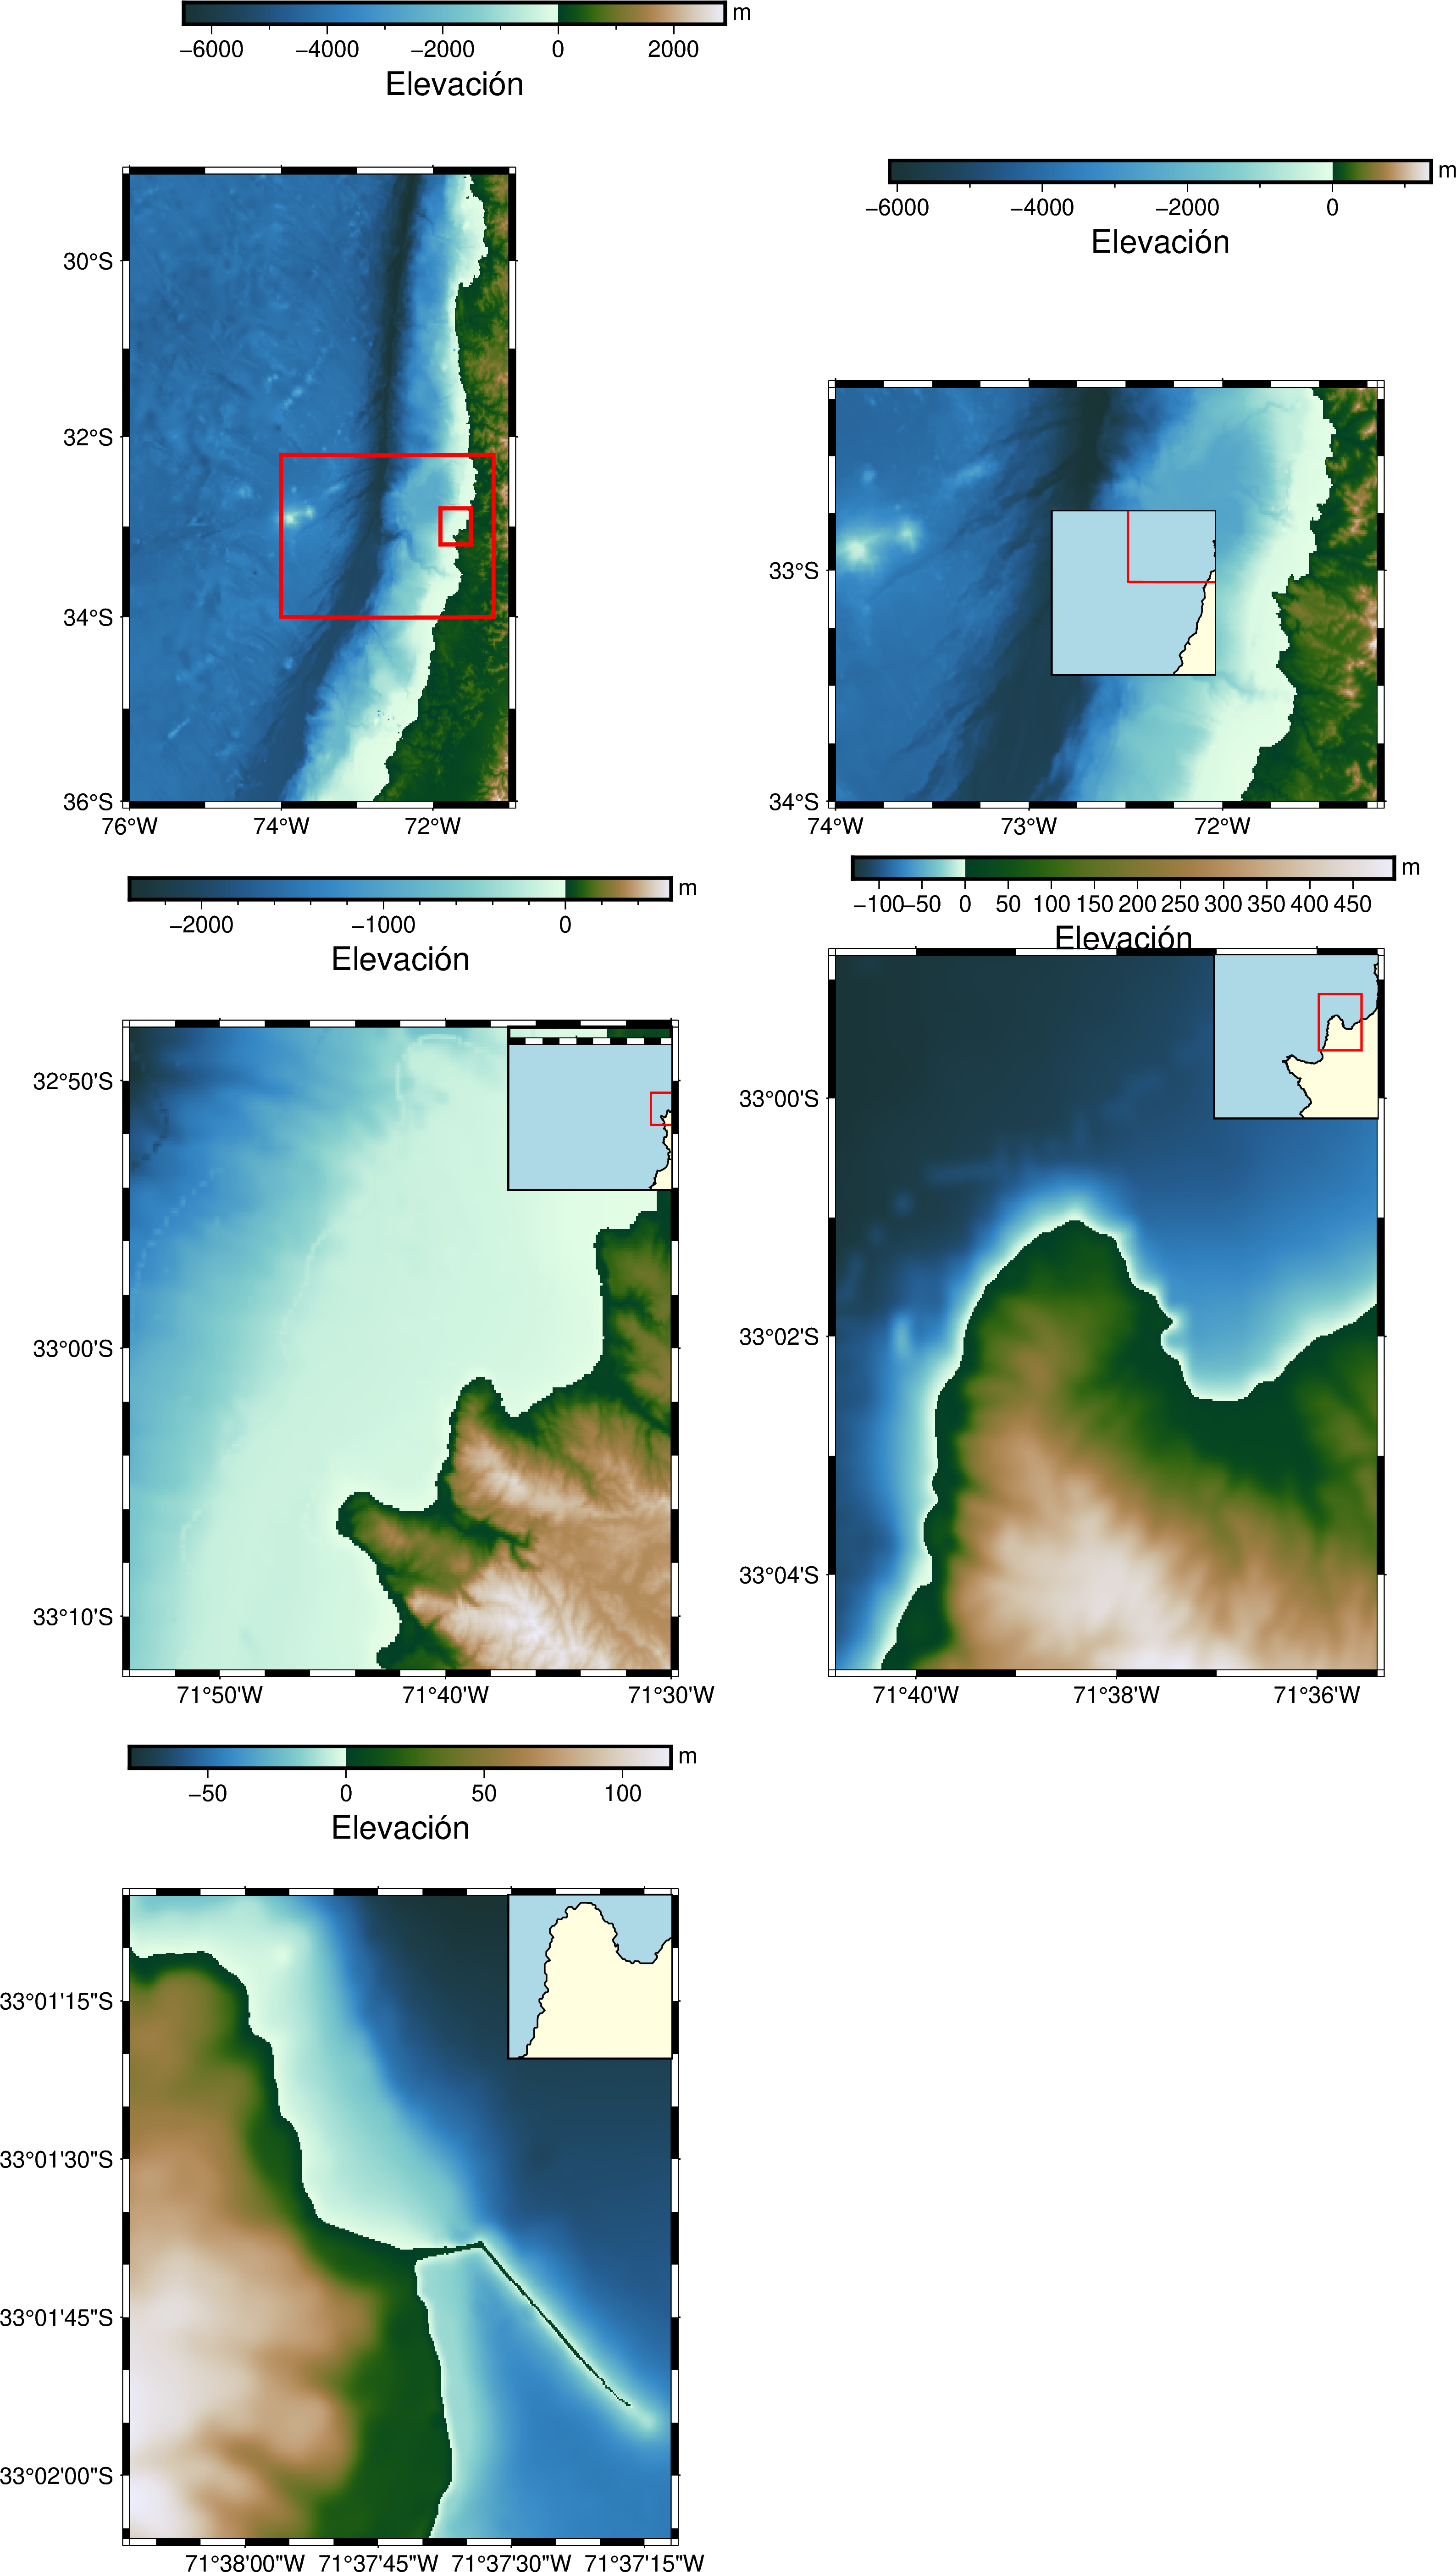

In [49]:
rectangle = [[r2[0], r2[2], r2[1], r2[3]]]
rectangle2 = [[r3[0], r3[2], r3[1], r3[3]]]
rectangle3 = [[r4[0], r4[2], r4[1], r4[3]]]

fig=pygmt.Figure()
cmap=pygmt.makecpt(cmap='geo',series=[-800,800,200],continuous=True)
with fig.subplot(nrows=3, ncols=2, subsize=("12c", "15c")):
    with fig.set_panel(panel=0):
        fig.grdimage(grid=g1, region=r1, projection='M7c', frame=True,cmap='bukavu')
        fig.colorbar(frame=["x+lElevación", "y+lm"],position="jTC+w10c+h")
        fig.plot(data=rectangle, style="r+s", pen="2p,red",projection='M7c')
        fig.plot(data=rectangle2, style="r+s", pen="2p,red",projection='M7c')
        # fig.plot(data=rectangle3, style="r+s", pen="1p,red",projection='M7c')
    with fig.set_panel(panel=1):
        fig.grdimage(grid=g2, region=r2, projection='M10c', frame=True,cmap='bukavu')
        fig.colorbar(frame=["x+lElevación", "y+lm"],position="jTC+w10c+h")
        with fig.inset(position="jTR+w3c", box="+pblack",projection='M7c'):
            fig.coast(region=r1,
            shorelines="thin",
            projection='M3.5c',
            land="lightyellow",
            water="lightblue",
            frame=True)
            fig.plot(data=rectangle, style="r+s", pen="1p,red",projection='M3.5c')
    with fig.set_panel(panel=2):
        fig.grdimage(grid=g3, region=r3, projection='M10c', frame=True,cmap='bukavu')
        fig.colorbar(frame=["x+lElevación", "y+lm"],position="jTL+w10c+h")
        with fig.inset(position="jTR+w3c", box="+pblack",projection='M10c'):
            fig.coast(region=r2,
            shorelines="thin",
            projection='M3.5c',
            land="lightyellow",
            water="lightblue",
            frame=True)
            fig.plot(data=rectangle2, style="r+s", pen="1p,red",projection='M3.5c')
    with fig.set_panel(panel=3):
        fig.grdimage(grid=g4, region=r4, projection='M10c', frame=True,cmap='bukavu')
        fig.colorbar(frame=["a50", "x+lElevación", "y+lm"],position="jTL+w10c+h")
        with fig.inset(position="jTR+w3c", box="+pblack",projection='M10c'):
            fig.coast(region=r3,
            shorelines="thin",
            projection='M3.5c',
            land="lightyellow",
            water="lightblue",
            frame=True)
            fig.plot(data=rectangle3, style="r+s", pen="1p,red",projection='M3.5c')
    with fig.set_panel(panel=4):
        fig.grdimage(grid=g5, region=r5, projection='M10c', frame=True,cmap='bukavu')
        fig.colorbar(frame=["a50", "x+lElevación", "y+lm"],position="jTL+w10c+h")
        with fig.inset(position="jTR+w3c", box="+pblack",projection='M10c'):
            fig.coast(region=r4,
            shorelines="thin",
            projection='M3.5c',
            land="lightyellow",
            water="lightblue",
            frame=True)

fig.show()

fig.savefig('grids.png')

In [40]:
g1.x.values.min()

-76.0

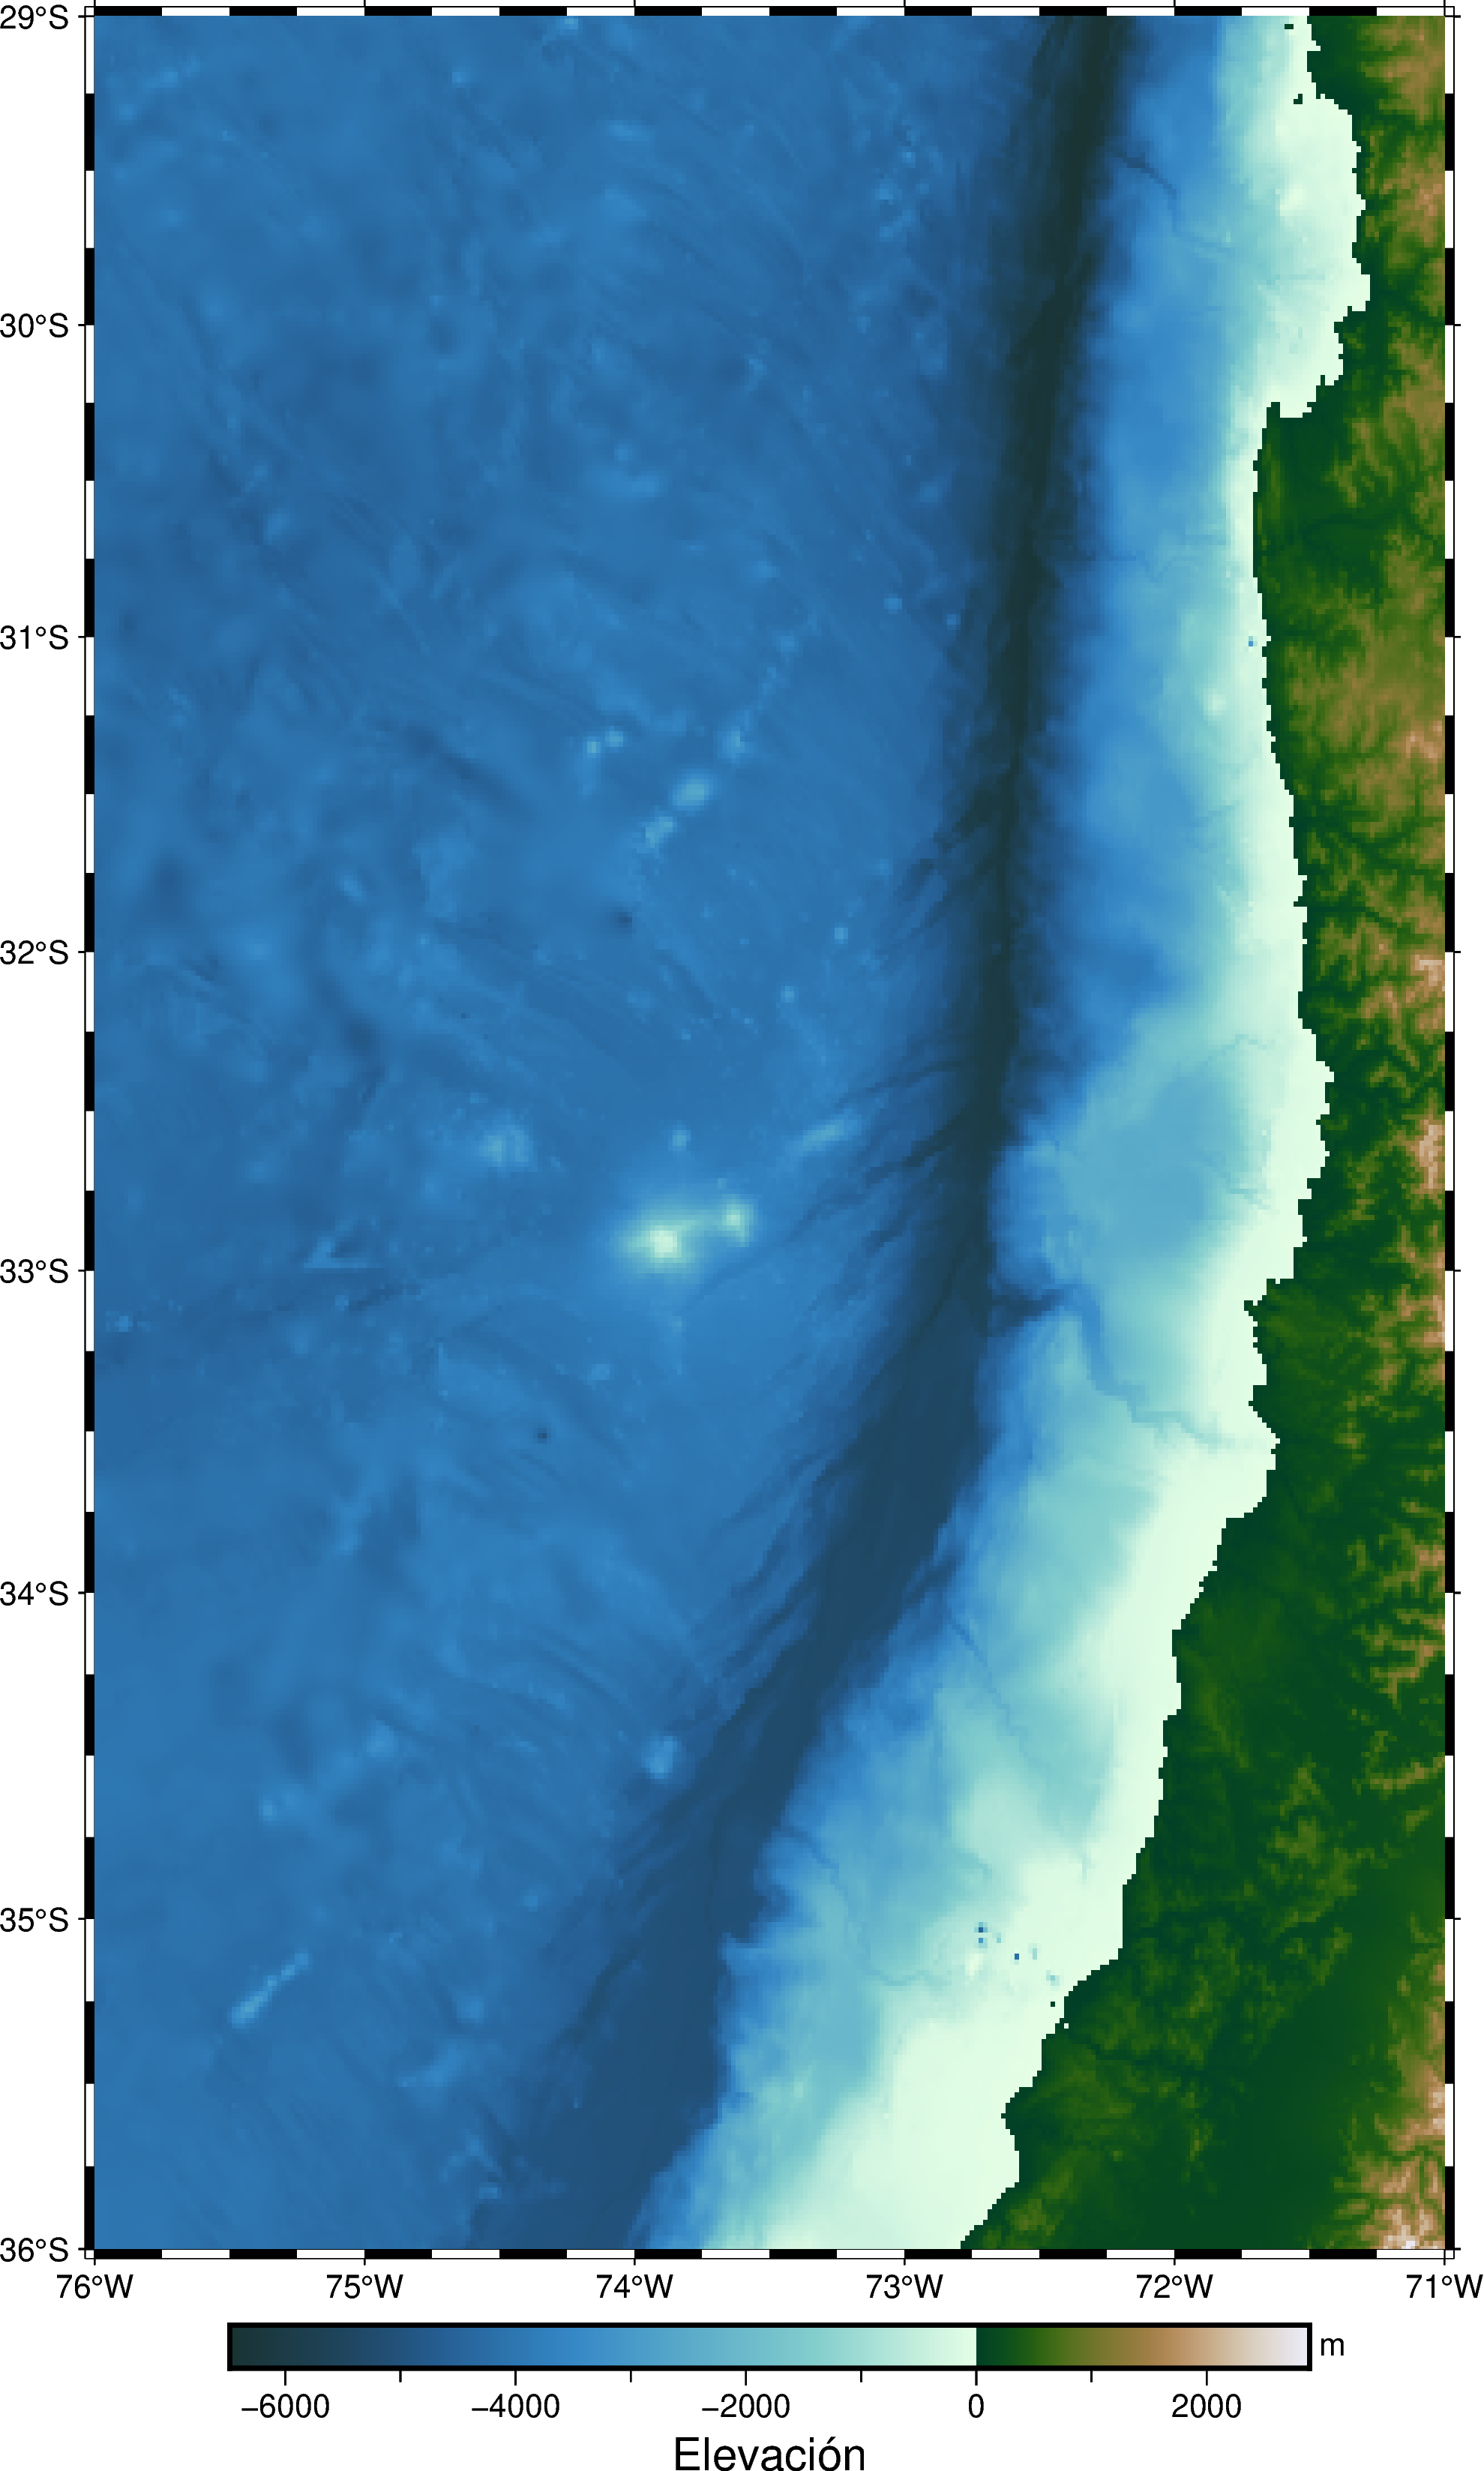

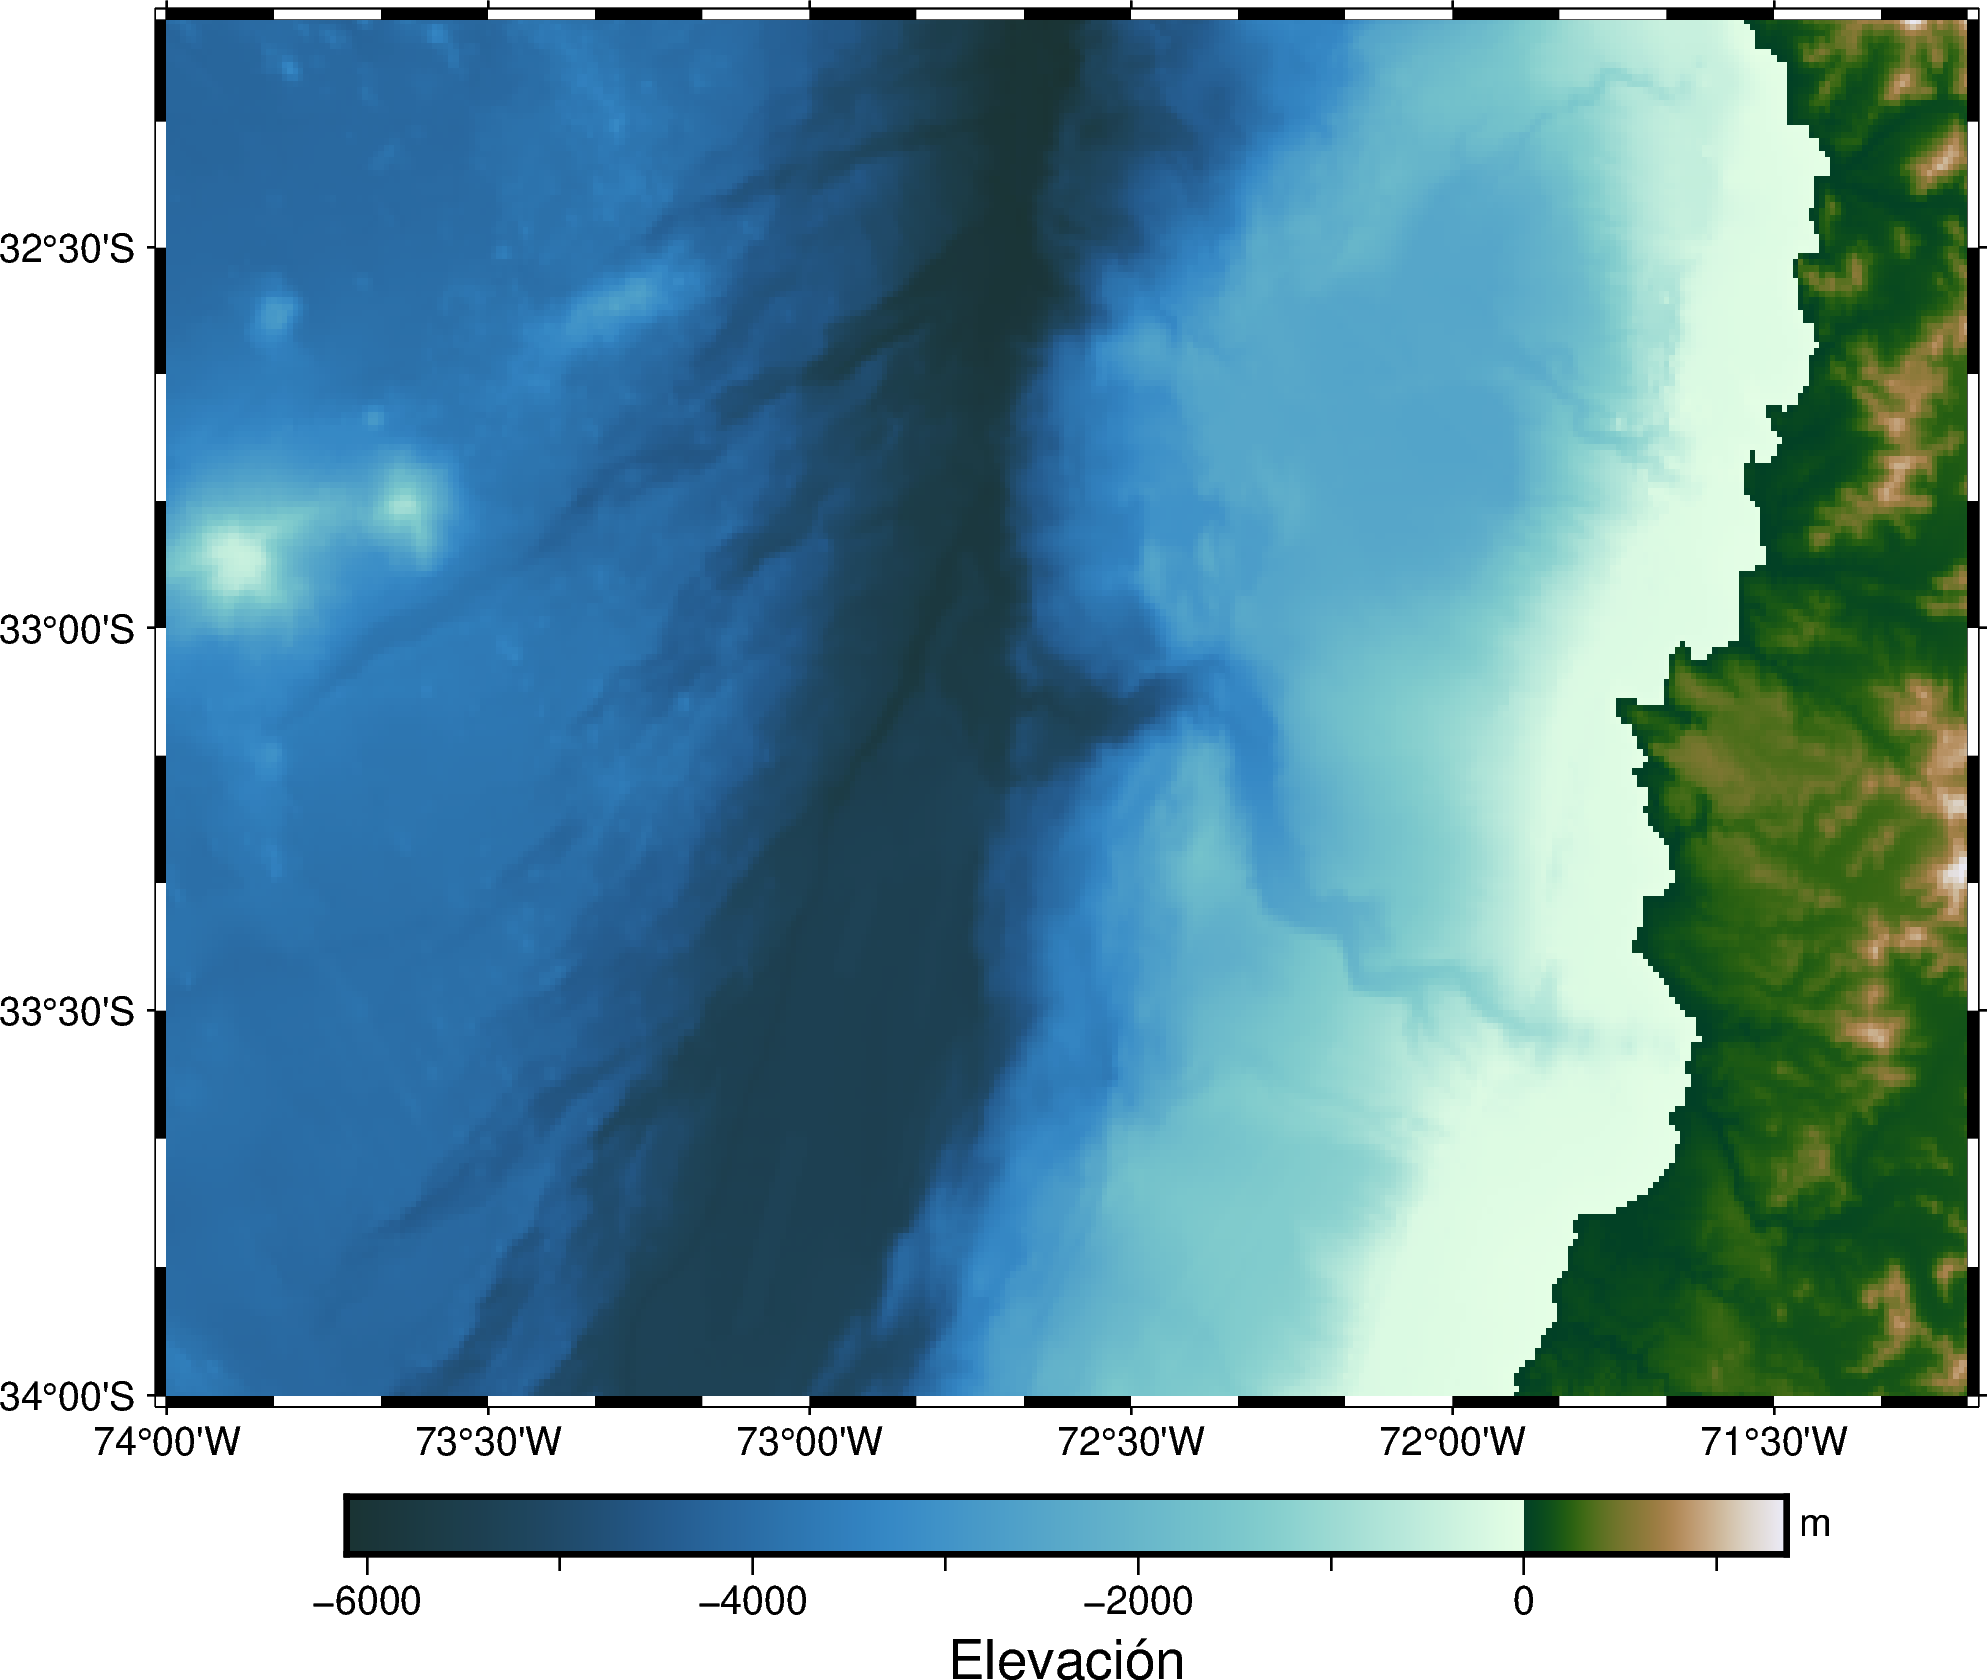

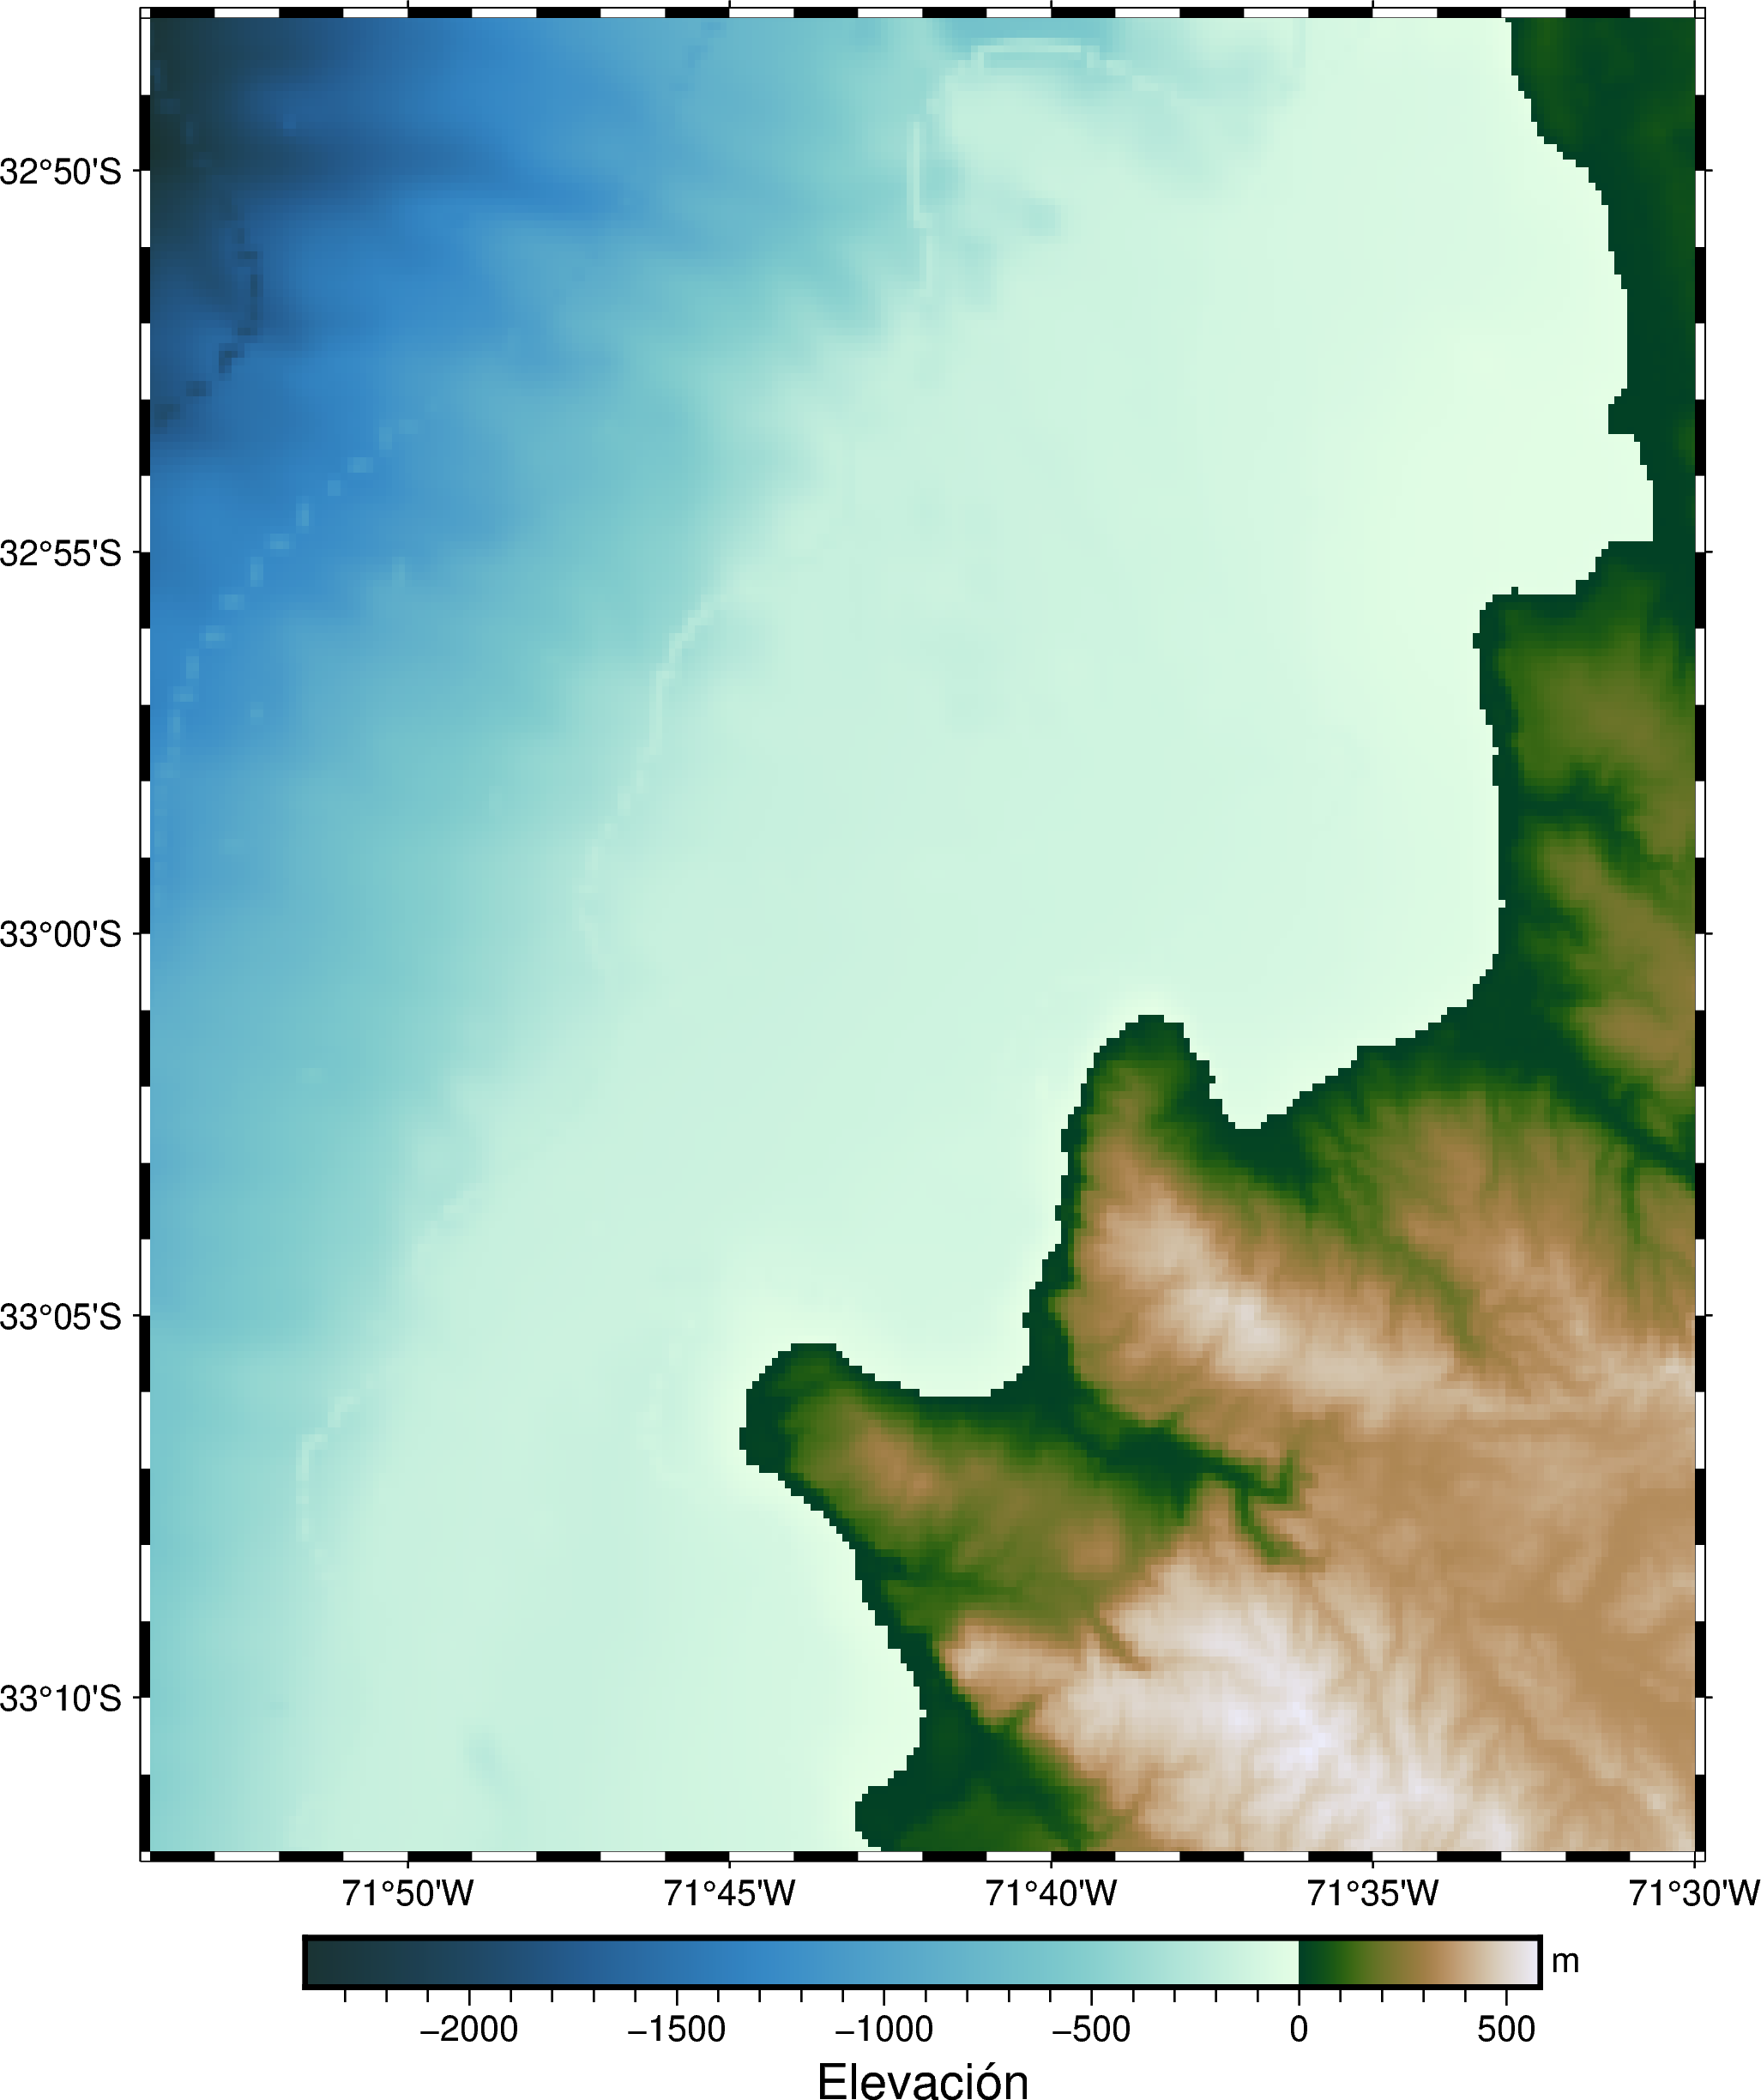

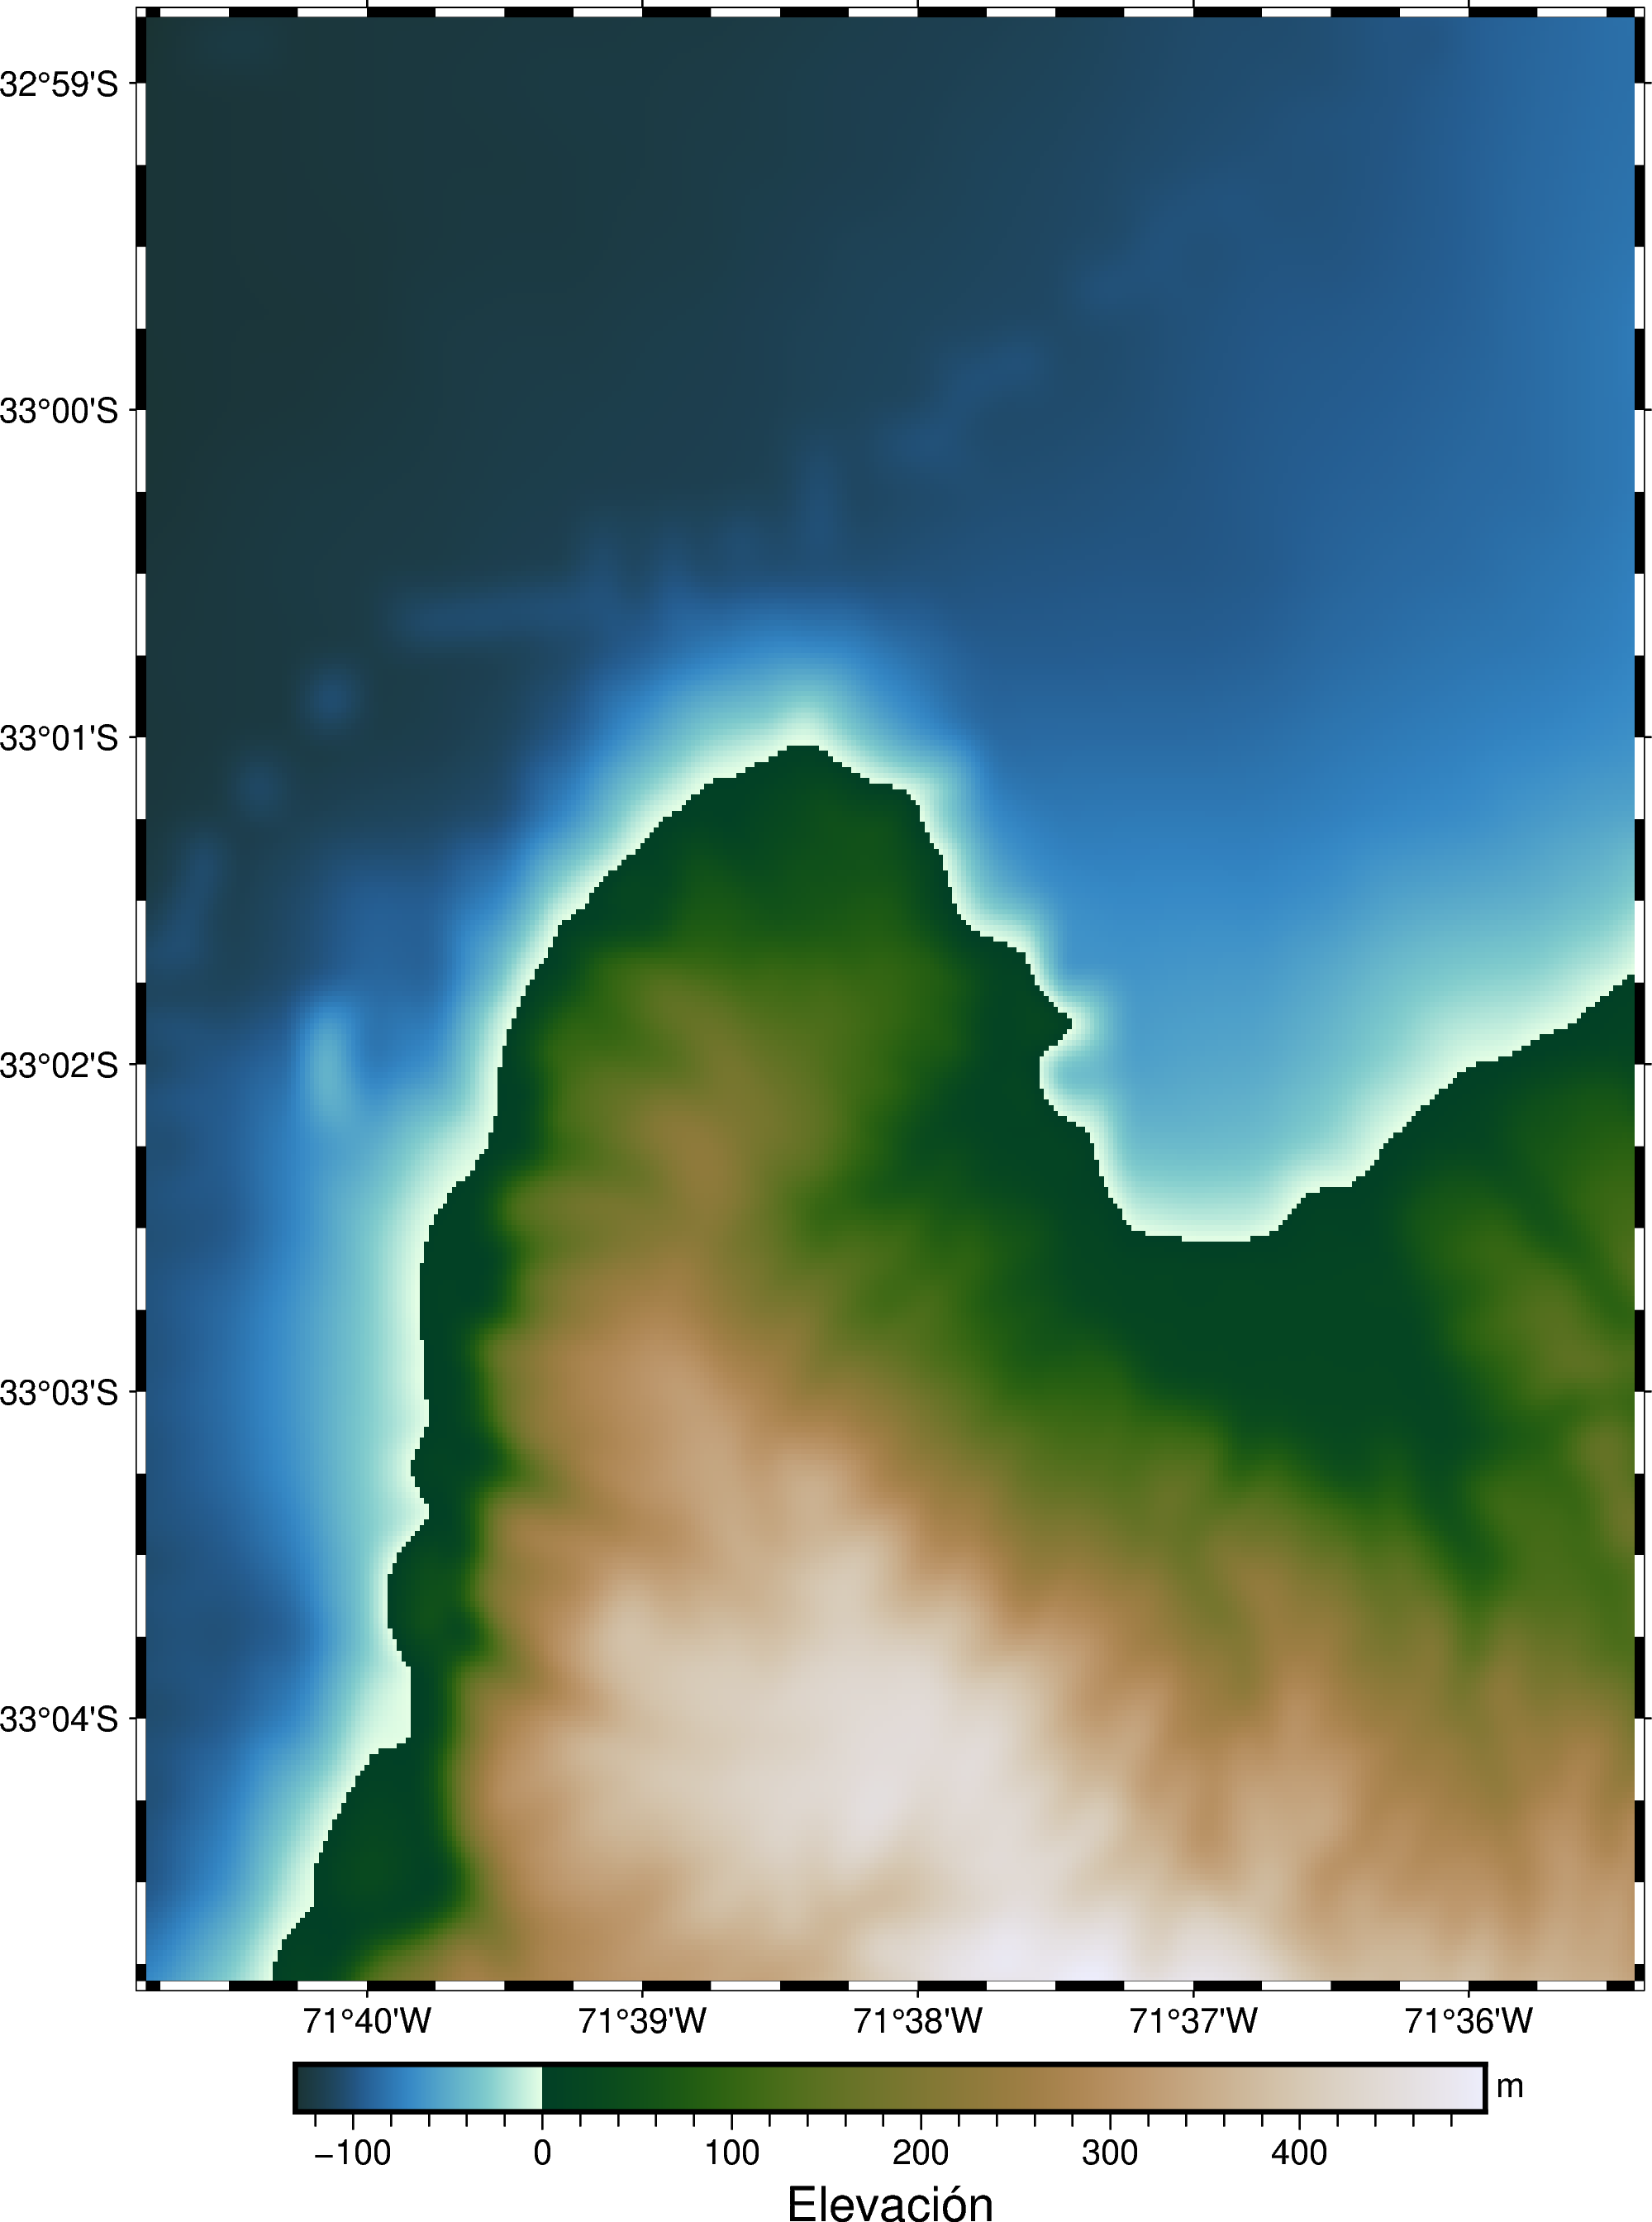

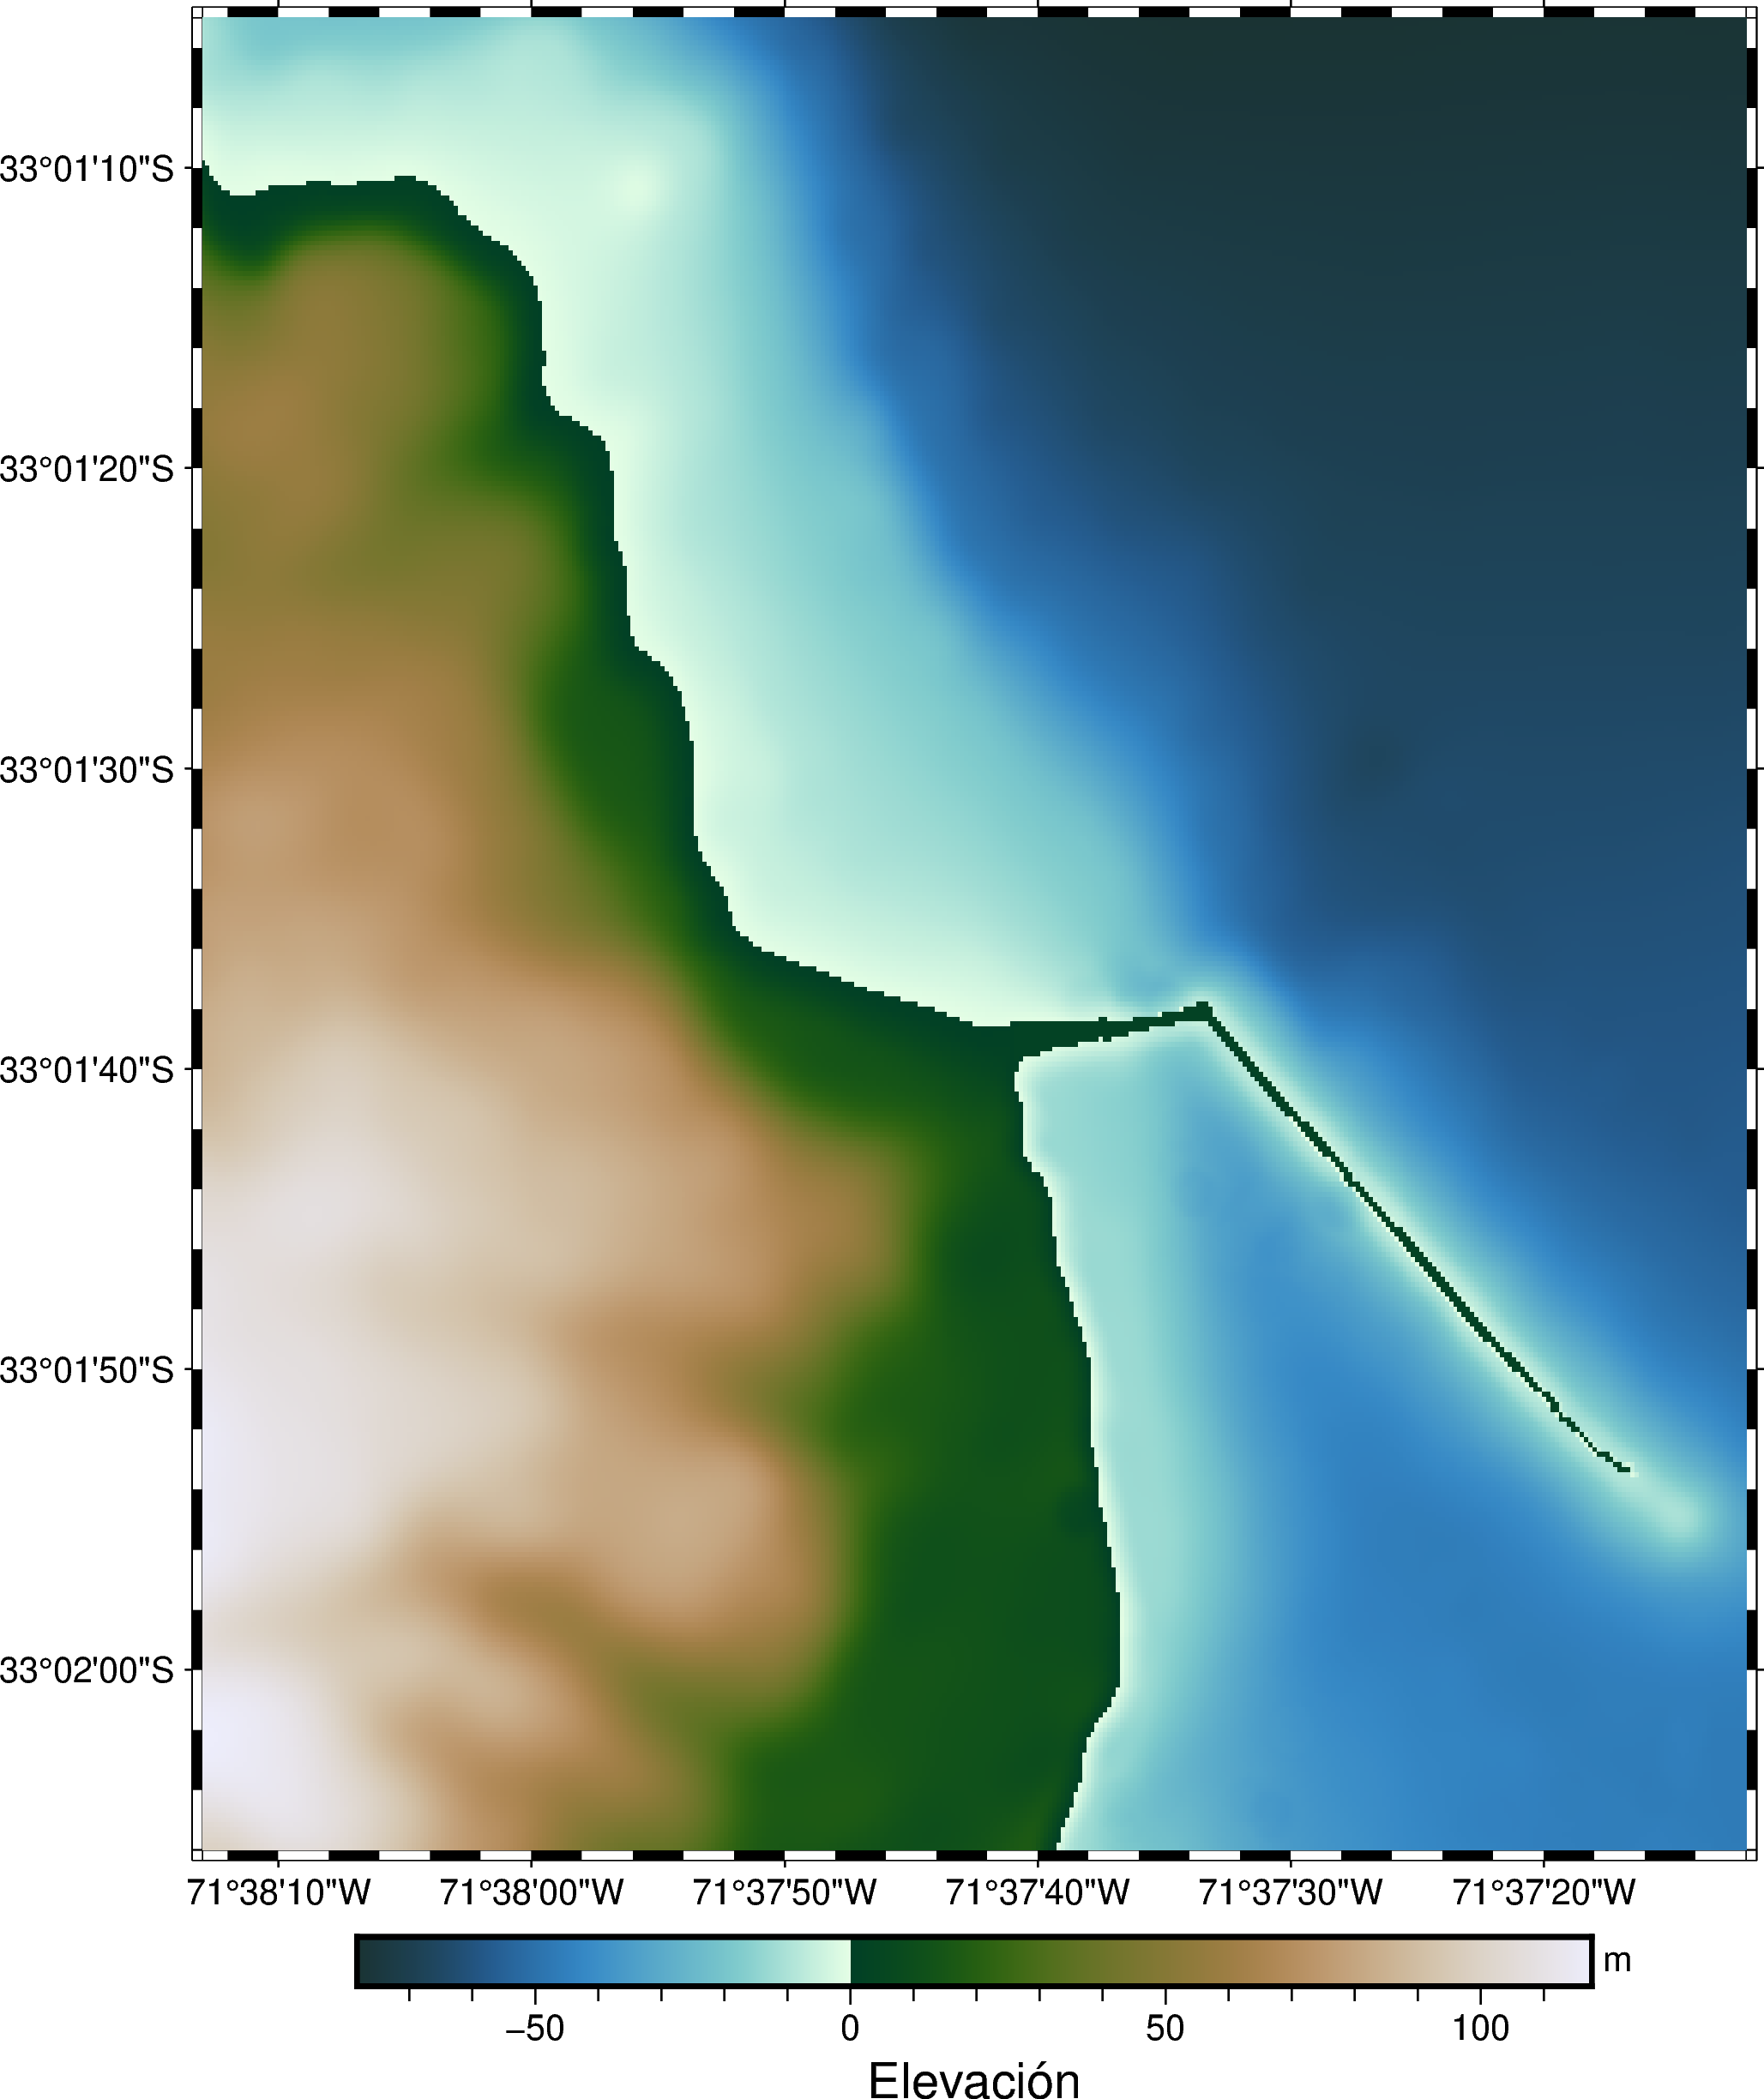

In [48]:
import pygmt

# Load the grid data
grids2=[g1,g2,g3,g4,g5]
# Create a figure for each grid
k=0
for i in grids2:
    k=k+1
    # Read the grid data
    fig = pygmt.Figure()

    # Set the region and projection
    fig.basemap(region=[i.x.values.min(), i.x.values.max(), i.y.values.min(), i.y.values.max()], projection="M6i",frame="afg")

    # Plot the grid
    fig.grdimage(grid=i, cmap="bukavu")
    fig.colorbar(frame=["x+lElevación", "y+lm"])
    # Add coastlines
    # Save the figure
    fig.savefig(f"figure{k+1}.png")

    # Show the figure
    fig.show()
    